In [1]:
from IPython import get_ipython
ip = get_ipython()
if ip is not None:
    ip.run_line_magic('load_ext', 'pymor.discretizers.builtin.gui.jupyter')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='torch')
import pymor.tools.random
pymor.tools.random._default_random_state = None

The pymor.discretizers.builtin.gui.jupyter extension is already loaded. To reload it, use:
  %reload_ext pymor.discretizers.builtin.gui.jupyter


In [2]:
from pymor.basic import *

In [3]:
domain = RectDomain([[0.,0.], [1.,1.]])

In [4]:
diffusion = ConstantFunction(1, 2)

In [5]:
rhs = ExpressionFunction('(sqrt( (x[...,0]-0.5)**2 + (x[...,1]-0.5)**2) <= 0.3) * 1.', 2, ())

In [6]:
problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    rhs=rhs,
)

In [7]:
m, data = discretize_stationary_cg(problem, diameter=1/4)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

In [8]:
U = m.solve()

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

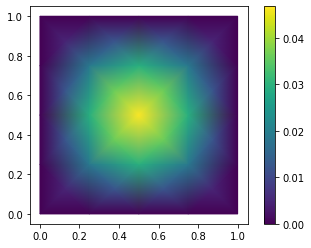

Output()

In [9]:
m.visualize(U)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

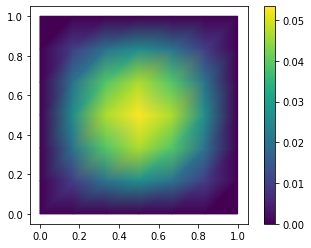

Output()

In [10]:
m, data = discretize_stationary_cg(problem, diameter=1/4, grid_type=RectGrid)
m.visualize(m.solve())

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

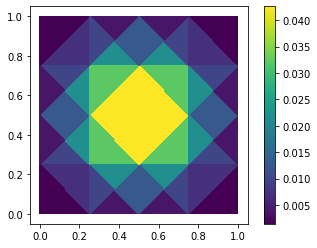

Output()

In [11]:
m, data = discretize_stationary_fv(problem, diameter=1/4, grid_type=TriaGrid)
m.visualize(m.solve())

In [12]:
set_log_levels({'pymor': 'WARN'})

In [13]:
domain = RectDomain(bottom='neumann')

In [14]:
neumann_data = ConstantFunction(-1., 2)

diffusion = ExpressionFunction('1. - (sqrt( (x[...,0]-0.5)**2 + (x[...,1]-0.5)**2) <= 0.3) * 0.999' , 2, ())

problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=neumann_data
)

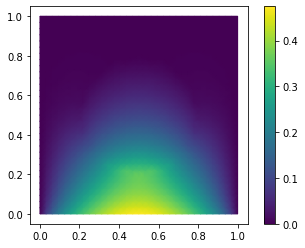

Output()

In [15]:
m, data = discretize_stationary_cg(problem, diameter=1/32)
m.visualize(m.solve())

In [16]:
diffusion = ExpressionFunction(
    '1. - (sqrt( (np.mod(x[...,0],1./K)-0.5/K)**2 + (np.mod(x[...,1],1./K)-0.5/K)**2) <= 0.3/K) * 0.999',
    2, (),
    values={'K': 10}
)

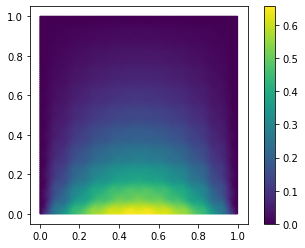

Output()

In [17]:
problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=neumann_data
)


m, data = discretize_stationary_cg(problem, diameter=1/100)
m.visualize(m.solve())

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

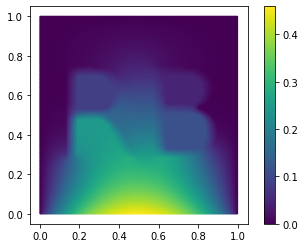

Output()

In [18]:
diffusion = BitmapFunction('RB.png', range=[0.001, 1])
problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=neumann_data
)

m, data = discretize_stationary_cg(problem, diameter=1/100)
m.visualize(m.solve())

In [19]:
neumann_data = ExpressionFunction('-cos(pi*x[...,0])**2*neum[0]', 2, (), parameters= {'neum': 1})

In [20]:
diffusion = ExpressionFunction(
    '1. - (sqrt( (np.mod(x[...,0],1./K)-0.5/K)**2 + (np.mod(x[...,1],1./K)-0.5/K)**2) <= 0.3/K) * 0.999',
    2, (),
    values={'K': 10}
)
problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=neumann_data
)

m, data = discretize_stationary_cg(problem, diameter=1/100)
m.parameters

Parameters({neum: 1})

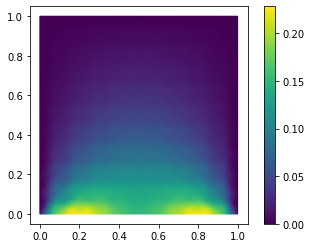

Output()

In [21]:
m.visualize(m.solve({'neum': [1.]}))

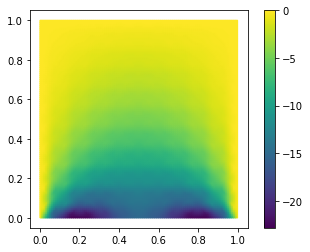

Output()

In [22]:
m.visualize(m.solve(-100))

In [23]:
diffusion = ExpressionFunction(
    '1. - (sqrt( (np.mod(x[...,0],1./K)-0.5/K)**2 + (np.mod(x[...,1],1./K)-0.5/K)**2) <= 0.3/K) * (1 - diffu[0])',
    2, (),
    values={'K': 10},
    parameters= {'diffu': 1}
)

In [24]:
problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=neumann_data
)

m, data = discretize_stationary_cg(problem, diameter=1/100)
m.parameters

Parameters({diffu: 1, neum: 1})

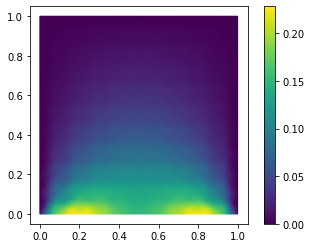

Output()

In [25]:
m.visualize(m.solve({'diffu': 0.001, 'neum': 1}))

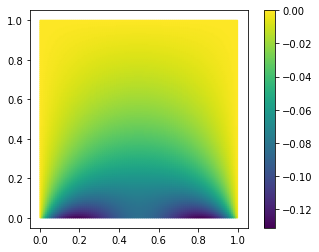

Output()

In [26]:
m.visualize(m.solve([1, -1]))

In [27]:
f_R = BitmapFunction('R.png', range=[1, 0])
f_B = BitmapFunction('B.png', range=[1, 0])

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

In [28]:
theta_R = ExpressionParameterFunctional('R[0] - 1', {'R': 1})
theta_B = ExpressionParameterFunctional('B[0] - 1', {'B': 1})

In [29]:
diffusion = LincombFunction(
    [ConstantFunction(1., 2), f_R, f_B],
    [1., theta_R, theta_B]
)
diffusion.parameters

Parameters({B: 1, R: 1})

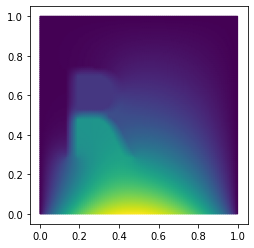

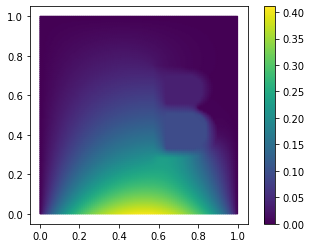

Output()

In [30]:
problem = StationaryProblem(
    domain=domain,
    diffusion=diffusion,
    neumann_data=ConstantFunction(-1, 2)
)
m, data = discretize_stationary_cg(problem, diameter=1/100)
m.visualize((m.solve([1., 0.001]), m.solve([0.001, 1])))

In [31]:
m.operator

LincombOperator(
    (NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='boundary_part'),
     NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_0'),
     NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_1'),
     NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_2')),
    (1.0, 1.0, ExpressionParameterFunctional('R[0] - 1', {R: 1}), ExpressionParameterFunctional('B[0] - 1', {B: 1})),
    name='ellipticOperator')